In [194]:
#imports
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv('credit_cleaned.csv')
rawData.head()

,Unnamed: 0,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default_pay_default,default_pay_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 30201 non-null  int64
 1   LIMIT_BAL                  30201 non-null  int64
 2   MARRIAGE                   30201 non-null  int64
 3   AGE                        30201 non-null  int64
 4   PAY_0                      30201 non-null  int64
 5   PAY_2                      30201 non-null  int64
 6   PAY_3                      30201 non-null  int64
 7   PAY_4                      30201 non-null  int64
 8   PAY_5                      30201 non-null  int64
 9   PAY_6                      30201 non-null  int64
 10  BILL_AMT1                  30201 non-null  int64
 11  BILL_AMT2                  30201 non-null  int64
 12  BILL_AMT3                  30201 non-null  int64
 13  BILL_AMT4                  30201 non-null  int64
 14  BILL_AMT5             

# Cross Validating Data used for finding Default

In [319]:
#features
X = rawData.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,0,0,1


In [320]:
#dependent variable
y = rawData['default_pay_default']
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
30196    0
30197    0
30198    1
30199    1
30200    1
Name: default_pay_default, Length: 30201, dtype: int64


In [321]:
algosClass=[]
algosClass.append(('Support Vector Regression', SVR()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
# algosClass.append(('Ada Boost Classifier', AdaBoostClassifier()))

algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
# algosClass.append(('Random Forest Classifier', RandomForestClassifier()))
# algosClass.append(('K Neighbors Classifier', KNeighborsClassifier()))

In [322]:
# validating
results=[]
names=[]
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [323]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Support Vector Regression -0.08523813524117974
Gradient Boosting Regressor 0.21856348115996568
Linear Regression 0.1207793305119278
Random Forest Regressor 0.18167035448730276


### Using the Model for Classification

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [247]:
algo=RandomForestClassifier()

In [248]:
model=algo.fit(X_train, y_train)

In [249]:
# Make predictions
predictions = model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test, predictions))
predRsquared=r2_score(y_test, predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.416
RMSE: 0.493


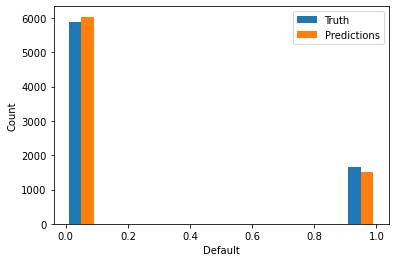

In [250]:
x=y_test
y=predictions
plt.figure(figsize=(6,4))
plt.hist([x,y], label=['Truth','Predictions'])
plt.xlabel('Default')
plt.ylabel('Count')
plt.legend()
plt.show();

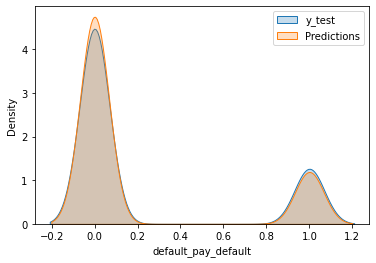

In [251]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(predictions, shade=True)
plt.legend(('y_test','Predictions'));

/Users/tomphoenixsnyder/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tomphoenixsnyder/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


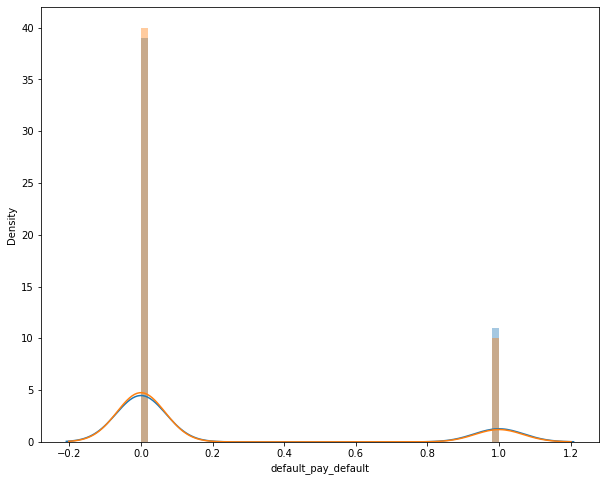

In [252]:
plt.figure(figsize=(10,8))

sns.distplot(y_test)
sns.distplot(predictions);

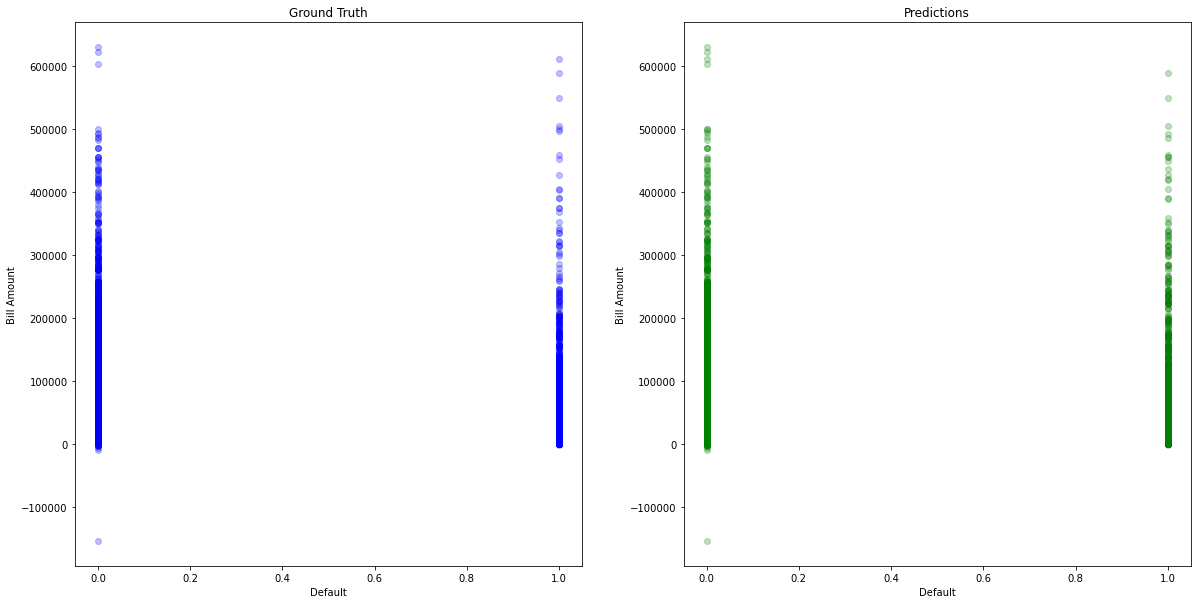

In [256]:
fig, axis = plt.subplots(1,2, figsize=(20,10))

axis[0].scatter(y_test, X_test['BILL_AMT1'], color='blue', alpha = 0.25)
axis[0].set_title('Ground Truth')
axis[0].set_xlabel('Default')
axis[0].set_ylabel('Bill Amount')

axis[1].scatter(predictions, X_test['BILL_AMT1'], color='green', alpha = 0.25)
axis[1].set_title('Predictions')
axis[1].set_xlabel('Default')
axis[1].set_ylabel('Bill Amount')

plt.show();

### Model predicts fewer defaults than ground truth. 
This means that the model errs on the side of risk.

## Using a Regression Model

In [258]:
algo=GradientBoostingRegressor()

In [259]:
model=algo.fit(X_train, y_train)

In [260]:
# Make predictions
predictions = model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test, predictions))
predRsquared=r2_score(y_test, predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.215
RMSE: 0.367


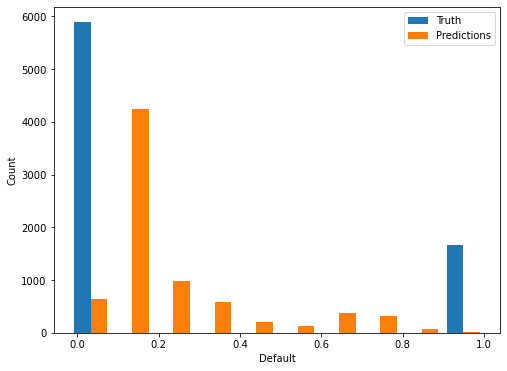

In [261]:
x=y_test
y=predictions
plt.figure(figsize=(8,6))
plt.hist([x,y], label=['Truth','Predictions'])
plt.xlabel('Default')
plt.ylabel('Count')
plt.legend()
plt.show();

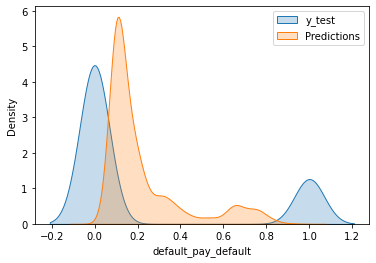

In [262]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(predictions, shade=True)
plt.legend(('y_test','Predictions'));

#### Regression model shows likeliness of someone to default

# Data used for finding Balance Limit

In [263]:
#features
X = rawData.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,1,0,0,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,1,0,0,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,1,0,0,0,1


In [264]:
#dependent variable
y = rawData['LIMIT_BAL']
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
30196    220000
30197    150000
30198     30000
30199     80000
30200     50000
Name: LIMIT_BAL, Length: 30201, dtype: int64


In [265]:
algosClass=[]

In [266]:
algosClass.append(('Support Vector Regression', SVR()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
algosClass.append(('Ada Boost Classifier', AdaBoostClassifier()))

algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('K Neighbors Classifier', KNeighborsClassifier()))

In [267]:
#regression
results=[]
names=[]
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

/Users/tomphoenixsnyder/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/tomphoenixsnyder/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [268]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Support Vector Regression -0.05081234087023582
Gradient Boosting Regressor 0.47015632701116233
Ada Boost Classifier -0.6709424864027138
Linear Regression 0.35808463706564764
Random Forest Regressor 0.46676187532268737
K Neighbors Classifier -0.10215635586782705


Gradient Boosting Regressor shows highest CV score

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Choosing the Gradient Boosting Regressor for model

In [270]:
algo=GradientBoostingRegressor()

In [271]:
model=algo.fit(X_train, y_train)

In [272]:
# Make predictions
predictions = model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test, predictions))
predRsquared=r2_score(y_test, predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.462
RMSE: 94552.797


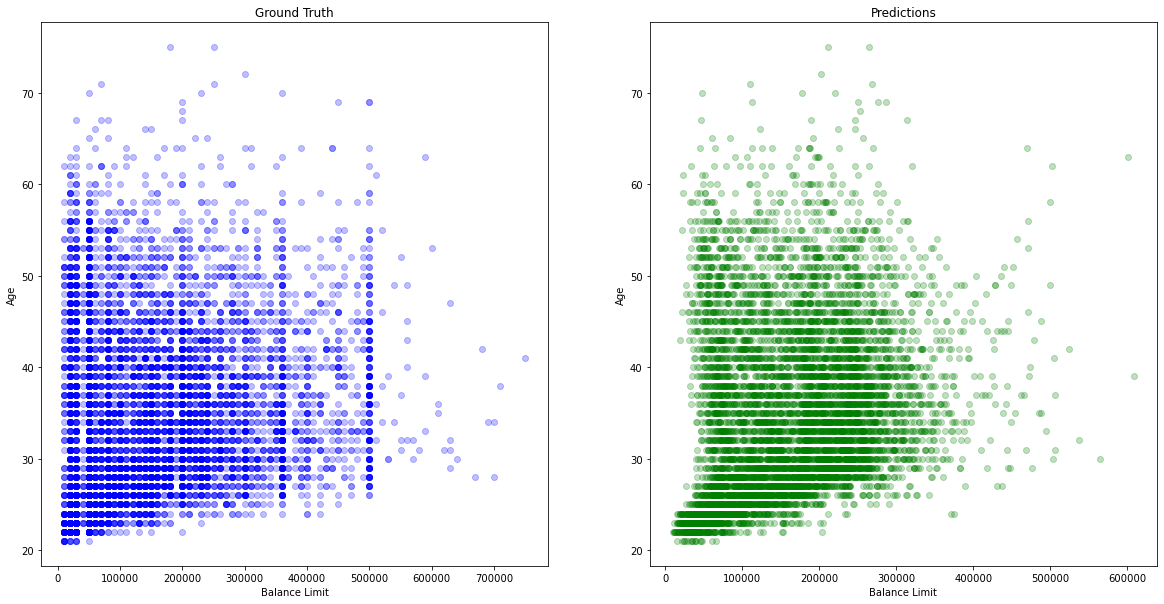

In [273]:
fig, axis = plt.subplots(1,2, figsize=(20,10))

axis[0].scatter(y_test, X_test['AGE'], color='blue', alpha = 0.25)
axis[0].set_title('Ground Truth')
axis[0].set_xlabel('Balance Limit')
axis[0].set_ylabel('Age')

axis[1].scatter(predictions, X_test['AGE'], color='green', alpha = 0.25)
axis[1].set_title('Predictions')
axis[1].set_xlabel('Balance Limit')
axis[1].set_ylabel('Age')

plt.show();

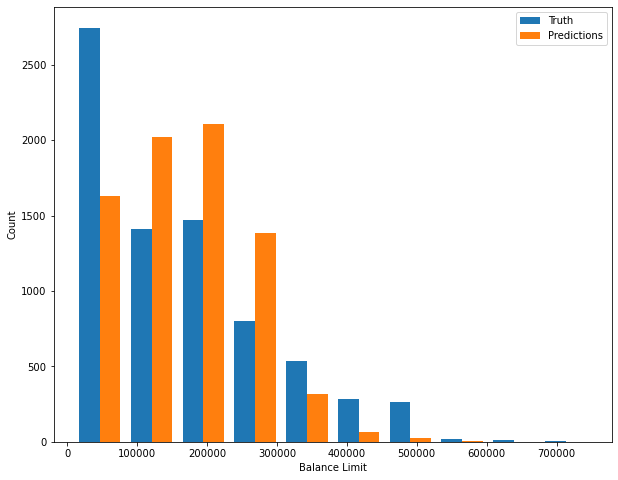

In [108]:
x=y_test
y=predictions
plt.figure(figsize=(10,8))
plt.hist([x,y], label=['Truth','Predictions'])
plt.xlabel('Balance Limit')
plt.ylabel('Count')
plt.legend()
plt.show();

Model predicts users to have a higher balance limit than the ground truth.